In [1]:
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os

In [2]:
def save_pkl(data, filename, local=False):
    """ Save data to file """
    # create path
    parent_dir = os.path.dirname(filename)
    if not os.path.exists(parent_dir):
        os.makedirs(parent_dir)

    # save file
    output = open(filename, 'wb')
    pickle.dump(data, output, pickle.HIGHEST_PROTOCOL)
    output.close()


def load_pkl(filename, local=False):
    """ Load data to pickle """
    input = open(filename, 'rb')
    data = pickle.load(input)
    input.close()
    return data

In [11]:
# Data file
raw_data_path = '../../data/raw data/text8'
context_to_dict_path = '../../data/text8_ng3/dict/cont_to_int.dict'
output_path = '../../data/text8_ng3/contexts/distribution_from_raw.pkl'
int_to_cont = load_pkl('../../data/text8_ng3/dict/int_to_cont.dict', local=True)

In [12]:
# Load data
with open(raw_data_path, encoding='utf-8') as f:
    words = f.read().split()
    
# Load dict
context_to_dict = load_pkl(context_to_dict_path, local=True)

# Convert vocab to int
context = []
for word in words:
    if word in context_to_dict:
        context.append(context_to_dict[word])

In [13]:
context_counts = Counter(context)
n_context = len(context_to_dict)
n_data = sum(list(context_counts.values()))

context_distribution = np.zeros(n_context)
for c, count in context_counts.items():
    context_distribution[c] = count / n_data
    
context_distribution = np.array(context_distribution)

In [14]:
save_pkl(context_distribution, output_path)

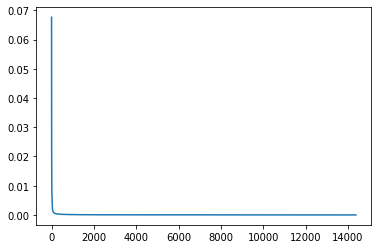

In [15]:
sorted(context_distribution)
plt.plot(context_distribution)
plt.show()

In [16]:
context_distribution[:100]

array([0.067647  , 0.0378374 , 0.02655343, 0.02624336, 0.02372185,
       0.02076919, 0.0201639 , 0.01688791, 0.0159609 , 0.01227797,
       0.01167307, 0.0084011 , 0.00798491, 0.00754897, 0.00743839,
       0.00737969, 0.00731507, 0.00718964, 0.00712744, 0.00697951,
       0.00689487, 0.00651011, 0.0063532 , 0.00609316, 0.00581573,
       0.00487737, 0.00467387, 0.00464436, 0.00439414, 0.00398994,
       0.00394673, 0.00390568, 0.0037496 , 0.00349186, 0.00347835,
       0.00341442, 0.00282711, 0.0028064 , 0.002531  , 0.00249111,
       0.00241335, 0.00225351, 0.00206708, 0.00200909, 0.00188442,
       0.00183618, 0.0018198 , 0.00179481, 0.00179093, 0.00167168,
       0.0016713 , 0.00162923, 0.00162643, 0.00161776, 0.00155594,
       0.00153573, 0.00152942, 0.00151496, 0.00144912, 0.00144721,
       0.00134638, 0.00131439, 0.00130553, 0.00130508, 0.00130094,
       0.00126601, 0.00124045, 0.00122408, 0.00121828, 0.00119865,
       0.00114396, 0.00112051, 0.00111636, 0.00110751, 0.00109